In [1]:
# Pandas library for the pandas dataframes and other plotting tools
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

# Import Scikit-Learn library for models
from sklearn.model_selection import train_test_split
from sklearn import neighbors, datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix # plotting confusion matrix 

# Import cleaning and splitting functions
from clean_split_data import clean_data
from clean_split_data import split_data

# For confusion matrix count
from collections import Counter

### Data

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data = clean_data(data)
X_train, X_test, y_train, y_test = split_data(data)

### Classifier

In [4]:
K_neighbors = 10
clf = neighbors.KNeighborsClassifier(K_neighbors, weights='uniform')
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

### kNN Prediction (User Input)

In [5]:
def predict(test_data):
    '''
    Takes test data and uses classifier to predict boolean output.
    '''
    y_pred = clf.predict(test_data)
    
    return y_pred

### Sample Train, Test, Splits Results

In [6]:
def sample_results():
    '''
    Returns the results and confusion matrix of the sample dataset from Breast Cancer Wisconsin Dataset.
    '''
    y_pred = clf.predict(X_test)
    ones_incorrect = 0
    zeros_incorrect = 0    
    y_test_list = list(y_test)
    y_pred_list = list(y_pred)
    for test, pred in zip(y_test_list, y_pred_list):
        if test == 0 and test != pred:
            zeros_incorrect += 1
        elif test == 1 and test != pred:
            ones_incorrect += 1
        else:
            pass
    zeros_true, ones_true = y_test.value_counts()
    zeros_correct = zeros_true - zeros_incorrect
    ones_correct = ones_true - ones_incorrect
    confusion_array = [[zeros_correct, zeros_incorrect],
                        [ones_incorrect, ones_correct]]
    df_confusion = pd.DataFrame(confusion_array, index=["0", "1"], columns=["0", "1"])
    print("Mean accuracy of prediction", clf.score(X_test, y_test))
    print("The confusion matrix for the sample dataset using kNN Neighbors is displayed below: ")
    fig, ax = plt.subplots(figsize=(10, 7))
    sns.set(font_scale=1.5)
    ax.set_xlabel('Predicted label', fontsize=15)
    ax.set_ylabel("True label", fontsize=15)
    sns.heatmap(df_confusion, annot=True, cmap='viridis', ax=ax)
#     plt.figure(figsize = (10,7))
#     plt.show()

Mean accuracy of prediction 0.9385964912280702
The confusion matrix for the sample dataset using kNN Neighbors is displayed below: 


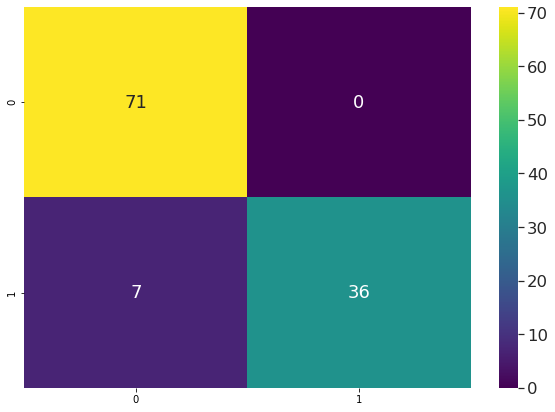

In [7]:
sample_results()

In [8]:
# means_data= list(data.columns[1:11])
# errors_data= list(data.columns[11:21])
# worsts_data= list(data.columns[21:])
# corr = data[means_data].corr()
# plt.figure(figsize=(10,8))
# plt.title("Correlation between Each Parameters")
# sns.heatmap(corr,cbar=True, annot = True, fmt='.4f', xticklabels=means_data, yticklabels=means_data, cmap="viridis")

From heatmap above, we observe that there are 6 sets of parameters that are highly correlated to each other: 
1. Radius and Perimeter 
2. Radius and area 
3. Parimeter and area 
4. Concavity and Concave points 
5. Compactness and concavity 
6. Compactness and concave points
However, since the correlation between compactness and concavity and the correlation between conpactness and concave points are below 0.9, we decided to keep both of the parameters. 

Since Perimeter and area are both correlated to radius. we choose radius. From the set of Cancavity and Concave points, we choose concavity